# Batch GD (Single variable)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=np.genfromtxt("RegData.csv",delimiter=",")

In [3]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

In [4]:
x=data[:,0]
x.shape

(13,)

In [5]:
y=data[:,1]
y.shape

(13,)

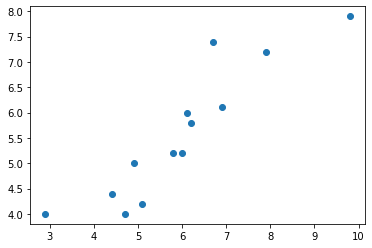

In [6]:
plt.scatter(x,y)

In [7]:
def Batch_GD_singleval(x,y,iterations,alpha,threshold_cost):
    ##1-assume theta0,theta1 
    theta0=0
    theta1=0 
    m=len(x)
    cost_list=[]
    theta0_list=[]
    theta1_list= []
    for i in range(iterations):
        
        ##2-calculate hypothesis 
        hypothesis=theta0+theta1*x 
    
        ##3-calculate error 
        e=hypothesis-y 
        
        ##4-calculate cost function 
        cost=np.sum(e**2)/(2*m)
        cost_list.append(cost)
        
        ##5- calculate gradient
        gradient0=np.sum(e)/m 
        gradient1=np.dot(e.T,x)/m 
        
        ##6-update theta 
        theta0=theta0-alpha*gradient0 
        theta1=theta1-alpha*gradient1 
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        
        ##stop condition 
        if(abs(cost_list[i]-cost_list[i-1])<threshold_cost and i>0):
            print("stopped at iteration {}".format(i))
            break
        
    return cost_list , theta0_list,theta1_list
    
    

In [11]:
 cost_list,theta0_list,theta1_list=Batch_GD_singleval(x,y,1000,0.001,0.00001)

stopped at iteration 169


Text(0.5, 1.0, 'cost function vs Epochs')

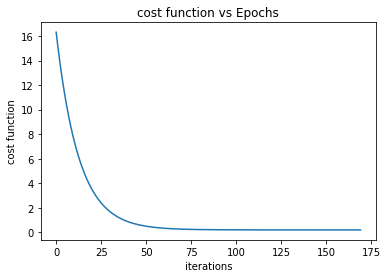

In [12]:
plt.plot(cost_list)
plt.xlabel("iterations")
plt.ylabel("cost function")
plt.title("cost function vs Epochs")

Text(0.5, 1.0, 'cost function vs theta0')

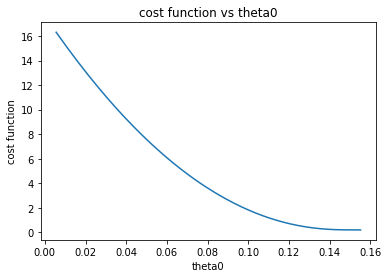

In [13]:
plt.plot(theta0_list,cost_list)
plt.xlabel("theta0")
plt.ylabel("cost function")
plt.title("cost function vs theta0")

Text(0.5, 1.0, 'cost function vs theta1')

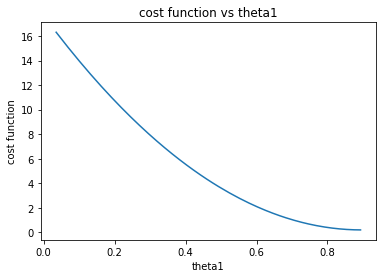

In [14]:
plt.plot(theta1_list,cost_list)
plt.xlabel("theta1")
plt.ylabel("cost function")
plt.title("cost function vs theta1")

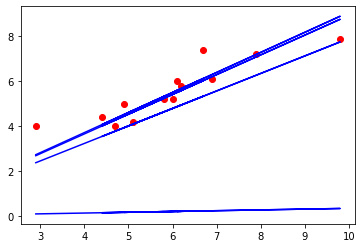

In [15]:
plt.plot(x,y,'or',linestyle='none')
for i in range(0,len(theta0_list),50):
    plt.plot(x,theta0_list[i]+theta1_list[i]*x,'b')


Text(0.5, 1.0, 'best peridected fitting line for 1000 iterations')

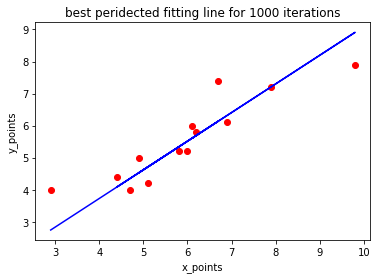

In [16]:
plt.plot(x,y,'or',linestyle='none')
plt.plot(x,theta0_list[-1]+theta1_list[-1]*x,'b')
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("best peridected fitting line for 1000 iterations")

In [17]:
from sklearn.metrics import r2_score
r2_score(y,theta0_list[-1]+theta1_list[-1]*x)

0.7483294467693762

# Batch GD on generated data 

In [8]:
x_gen=np.linspace(0,20,30)
y_gen=-2*x_gen+1

In [19]:
len(y_gen)

30

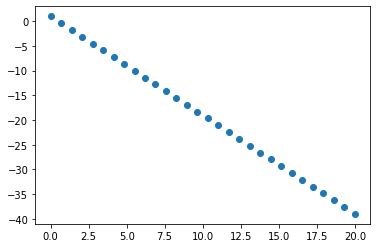

In [20]:
plt.scatter(x_gen,y_gen)

In [21]:
 cost_list,theta0_list,theta1_list=Batch_GD_singleval(x_gen,y_gen,1000,0.0001,0.00001)

stopped at iteration 565


Text(0.5, 1.0, 'cost function vs Epochs')

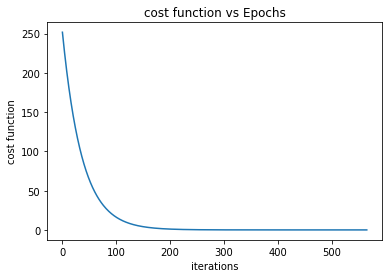

In [22]:
plt.plot(cost_list)
plt.xlabel("iterations")
plt.ylabel("cost function")
plt.title("cost function vs Epochs")

Text(0.5, 1.0, 'cost function vs theta0')

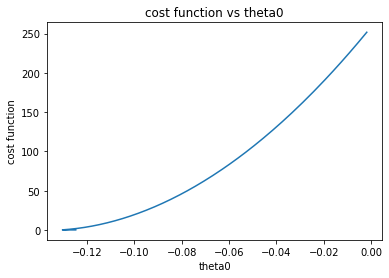

In [23]:
plt.plot(theta0_list,cost_list)
plt.xlabel("theta0")
plt.ylabel("cost function")
plt.title("cost function vs theta0")

Text(0.5, 1.0, 'cost function vs theta1')

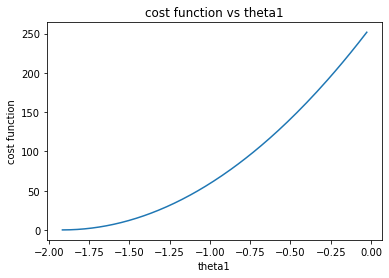

In [24]:
plt.plot(theta1_list,cost_list)
plt.xlabel("theta1")
plt.ylabel("cost function")
plt.title("cost function vs theta1")

Text(0.5, 1.0, 'best peridected fitting line for 1000 iterations')

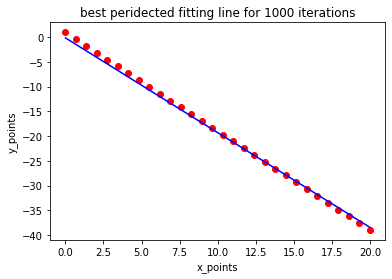

In [25]:
plt.plot(x_gen,y_gen,'or',linestyle='none')
plt.plot(x_gen,theta0_list[-1]+theta1_list[-1]*x_gen,'b')
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("best peridected fitting line for 1000 iterations")

In [26]:
from sklearn.metrics import r2_score
r2_score(y_gen,theta0_list[-1]+theta1_list[-1]*x_gen)

0.9976675373880955

# Stochastic Batch GD

In [27]:
def stochastic_GD(x,y,iterations,alpha,threshold_cost):
    ##1-assume theta 
    theta0=0
    theta1=0 
    m=len(x)
    cost_list=[]
    theta0_list=[]
    theta1_list= []
    for i in range(iterations):
        for j in range(m):
            
        ##2-cal hypothesis 
            hypothesis=theta0+theta1*x[j] 
    
        ##3-cal error 
            e=hypothesis-y[j]
        
        ##4-cal cost 
            cost=(e**2)/2 
            cost_list.append(cost)
        
        ##5-cal gradient
            gradient0=e
            gradient1=e*x[j]
        
        
        ##6-update theta 
            theta0=theta0-alpha*gradient0 
            theta1=theta1-alpha*gradient1 
            theta0_list.append(theta0)
            theta1_list.append(theta1)
            
        
        ##stop conditon 
        
        if(abs(cost_list[i*m]-cost_list[(i-1)*m])<threshold_cost and i>0):
             print("stopped at iteration {}".format(i))
             break
        
    return cost_list,theta0_list,theta1_list
            

In [28]:
cost_list,theta0_list,theta1_list=stochastic_GD(x_gen,y_gen,1000,0.01,0.0001)

stopped at iteration 74


Text(0.5, 1.0, 'cost function vs Epochs')

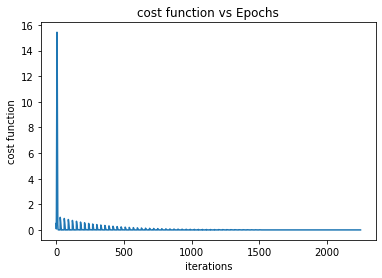

In [29]:
plt.plot(cost_list)
plt.xlabel("iterations")
plt.ylabel("cost function")
plt.title("cost function vs Epochs")

Text(0.5, 1.0, 'cost function vs theta0')

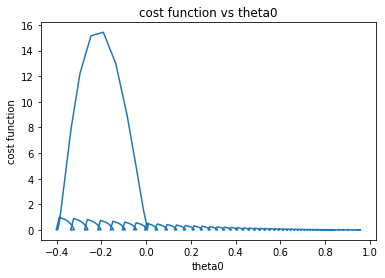

In [30]:
plt.plot(theta0_list,cost_list)
plt.xlabel("theta0")
plt.ylabel("cost function")
plt.title("cost function vs theta0")

Text(0.5, 1.0, 'best peridected fitting line for 1000 iterations')

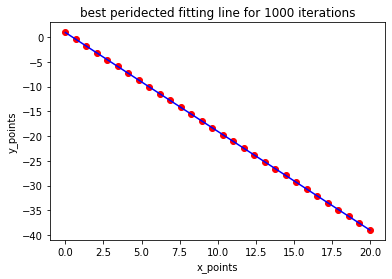

In [31]:
 plt.plot(x_gen,y_gen,'or',linestyle='none')
plt.plot(x_gen,theta0_list[-1]+theta1_list[-1]*x_gen,'b')
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("best peridected fitting line for 1000 iterations")

In [32]:
from sklearn.metrics import r2_score
r2_score(y_gen,theta0_list[-1]+theta1_list[-1]*x_gen)

0.9999956466096108

# Mini_Batch

In [33]:
def generate_batches(x,y,batch_size):
    for i in range(0,len(x),batch_size):
        yield x[i:i+batch_size],y[i:i+batch_size]

In [34]:
def mini_batch_GD(x,y,iterations,alpha,batch_size,threshold_cost):
    ##1-assume theta 
    theta0=0
    theta1=0 
    m=len(x)
    cost_list=[]
    theta0_list=[]
    theta1_list= []
    no_of_batches=m//batch_size
    for i in range(iterations):
        for x_batch,y_batch in generate_batches(x,y,batch_size):
            #2-cal hypothesis 
            hypothesis=theta0+theta1*x_batch 
            
            #3-cal error 
            e=hypothesis-y_batch 
            
            #4-cal cost
            cost=(np.sum(e**2))/len(x_batch)
            cost_list.append(cost)
            
            #5-cal gradient 
            gradient0 =(1/len(x_batch))* np.sum(e)
            gradient1=(1/len(x_batch))*np.sum(e*x_batch)
            
            #6-update theta 
            theta0=theta0-alpha*gradient0 
            theta1=theta1-alpha*gradient1 
            theta0_list.append(theta0)
            theta1_list.append(theta1)
            
            #stop codition      
        if(abs(cost_list[i*no_of_batches]-cost_list[(i-1)*no_of_batches])<threshold_cost and i>0):
             print("stopped at iteration {}".format(i))
             break
        
    return cost_list,theta0_list,theta1_list
            
            

In [35]:
cost_list,theta0_list,theta1_list=mini_batch_GD(x_gen,y_gen,1000,0.0001,5,0.0001)

stopped at iteration 85


In [36]:
len(cost_list)

516

Text(0.5, 1.0, 'cost function vs Epochs')

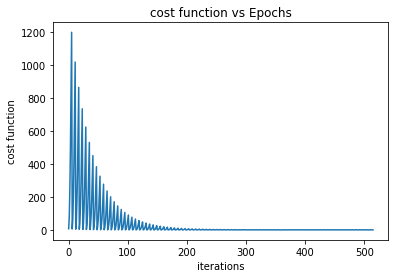

In [37]:
plt.plot(cost_list)
plt.xlabel("iterations")
plt.ylabel("cost function")
plt.title("cost function vs Epochs")

Text(0.5, 1.0, 'cost function vs theta0')

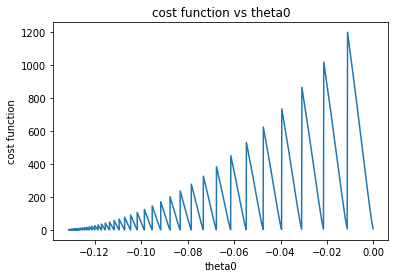

In [38]:
plt.plot(theta0_list,cost_list)
plt.xlabel("theta0")
plt.ylabel("cost function")
plt.title("cost function vs theta0")

Text(0.5, 1.0, 'best peridected fitting line for 1000 iterations')

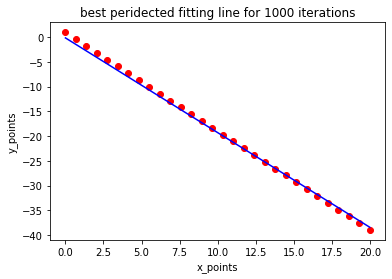

In [39]:
plt.plot(x_gen,y_gen,'or',linestyle='none')
plt.plot(x_gen,theta0_list[-1]+theta1_list[-1]*x_gen,'b')
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("best peridected fitting line for 1000 iterations")

In [40]:
from sklearn.metrics import r2_score
r2_score(y_gen,theta0_list[-1]+theta1_list[-1]*x_gen)

0.9976582845077668

# Batch_GD_vectorized

In [41]:
data_vectorized=np.genfromtxt("MultipleLR.csv",delimiter=",")

In [42]:
X=data_vectorized[:,0:3]
Y=data_vectorized[:,3]
Y=Y.reshape(25,1)

In [43]:
x0=np.ones((len(X),1))
X=np.concatenate((x0,X),axis=1)

In [44]:

X.shape


(25, 4)

In [45]:
def Vectorized_Batch_GD(x,y,alpha,iterations,m,n):
    m=len(x)
    cost_list=np.zeros(iterations)
    theta_list=np.zeros((iterations,n))
    stopped_val= iterations
    #1-assume theta 
    
    theta=np.zeros((n,1))
    for i in  range (iterations):
        #2-cal hypothesis 

        hypothesis=np.dot(x,theta).reshape(m,1) 
        #3-cal error 
        e=(hypothesis-y).reshape(m,1)
        
        #4- cal cost 
        cost=(1/(2*m))*np.sum(np.square(e))
        #print(cost)
        cost_list[i]=cost
        #5-cal gradient 
        gradient=((np.dot(x.T,e))/m).reshape(n,1)
        
        #6-update theta 
        theta=theta-alpha*gradient 
        theta_list[i,:]=theta.reshape(1,n)
        
        #stop codnition 
        if(np.linalg.norm(gradient)<5):
            stopped_val=i
            print("stopped at iteration {}".format(i))
            break

        
    return cost_list,theta_list,stopped_val
        
    
    
    

In [46]:
cost_list,theta_list,s=Vectorized_Batch_GD(X,Y,0.0001,1000,25,4)

stopped at iteration 374


Text(0.5, 1.0, 'cost function vs Epochs')

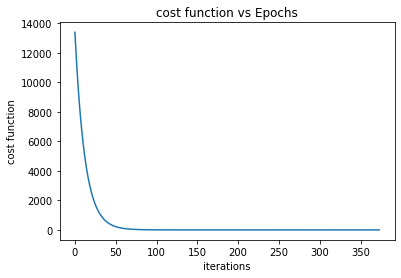

In [47]:
plt.plot(np.arange(0,s),cost_list[0:s])
plt.xlabel("iterations")
plt.ylabel("cost function")
plt.title("cost function vs Epochs")

# Momentum

In [9]:
def momentum_Batch_GD_singleval(x,y,iterations,alpha,gamma,threshold_cost):
    ##1-assume theta0,theta1 
    theta0=0
    theta1=0 
    mt0=0 
    mt1=0
    m=len(x)
    cost_list=[]
    theta0_list=[]
    theta1_list= []
    for i in range(iterations):
        
        ##2-calculate hypothesis 
        hypothesis=theta0+theta1*x 
    
        ##3-calculate error 
        e=hypothesis-y 
        
        ##4-calculate cost function 
        cost=np.sum(e**2)/(2*m)
        cost_list.append(cost)
        
        ##5- calculate gradient
        gradient0=np.sum(e)/m 
        gradient1=np.dot(e.T,x)/m 
        
        ##6-update theta 
        mt0=gamma*mt0+alpha*gradient0
        mt1=gamma*mt1+alpha*gradient1
        theta0=theta0-mt0
        theta1=theta1-mt1
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        
        ##stop condition 
        if(abs(cost_list[i]-cost_list[i-1])<threshold_cost and i>0):
            print("stopped at iteration {}".format(i))
            break
    
    return cost_list, theta0_list,theta1_list

In [95]:
cost_list,theta0_list,theta1_list=momentum_Batch_GD_singleval(x_gen,y_gen,1000,0.0001,0.9,0.0001)

stopped at iteration 107


Text(0.5, 1.0, 'cost function vs Epochs')

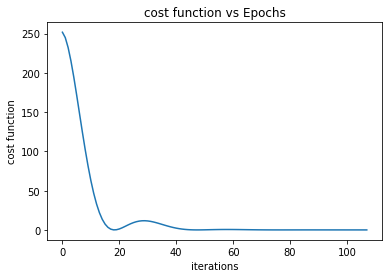

In [96]:
plt.plot(cost_list)
plt.xlabel("iterations")
plt.ylabel("cost function")
plt.title("cost function vs Epochs")

Text(0.5, 1.0, 'cost function vs theta0')

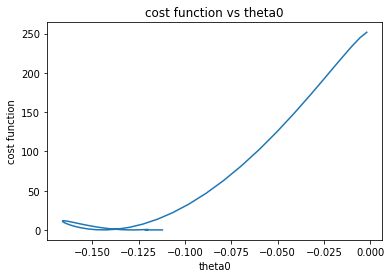

In [41]:
plt.plot(theta0_list,cost_list)
plt.xlabel("theta0")
plt.ylabel("cost function")
plt.title("cost function vs theta0")

Text(0.5, 1.0, 'best peridected fitting line for 1000 iterations')

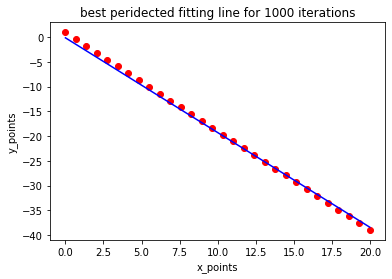

In [51]:
plt.plot(x_gen,y_gen,'or',linestyle='none')
plt.plot(x_gen,theta0_list[-1]+theta1_list[-1]*x_gen,'b')
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("best peridected fitting line for 1000 iterations")

In [52]:
from sklearn.metrics import r2_score
r2_score(y_gen,theta0_list[-1]+theta1_list[-1]*x_gen)

0.9977168017301881

# NAG

In [102]:
def NAG_Batch_GD_singleval(x,y,iterations,alpha,gamma,threshold_cost):
    ##1-assume theta0,theta1 
    theta0=0
    theta1=0 
    mt0=0
    mt1=0
    theta0temp=0
    theta1temp=0
    m=len(x)
    cost_list=[]
    theta0_list=[]
    theta1_list= []
    for i in range(iterations):
        
        ##2-calculate hypothesis 
        hypothesis=theta0+theta1*x 
    
        ##3-calculate error 
        e=hypothesis-y 
        
        ##4-calculate cost function 
        cost=np.sum(e**2)/(2*m)
        
        
        ##5- calculate gradient
        theta0temp=theta0-gamma*mt0
        theta1temp=theta1-gamma*mt1 
         
        hypothesistemp=theta0temp+theta1temp*x 
        e_temp=hypothesistemp-y
         
        gradient_temp0=(1/m)*(np.sum(e_temp))
        gradient_temp1=(1/m)*(np.dot(e_temp.T,x))
        
       ##update theta
        theta0= theta0temp-alpha*gradient_temp0
        theta1=theta1temp-alpha*gradient_temp1
        
       
        
        mt0=gamma*mt0+alpha*gradient_temp0
        mt1=gamma*mt1+alpha*gradient_temp1
        
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        cost_list.append(cost)
        
        ##stop condition 
        if(abs(theta0_list[i]-theta0_list[i-1])<threshold_cost and i>0):
            print("stopped at iteration {}".format(i))
            break
        if(abs(cost_list[i]-cost_list[i-1])<threshold_cost and i>0):
            print("stopped at iteration {}".format(i))
            break
        
    return cost_list , theta0_list,theta1_list

In [125]:
cost_list,theta0_list,theta1_list=NAG_Batch_GD_singleval(x_gen,y_gen,1000,0.001,0.7,0.0001)

stopped at iteration 8


Text(0.5, 1.0, 'cost function vs Epochs')

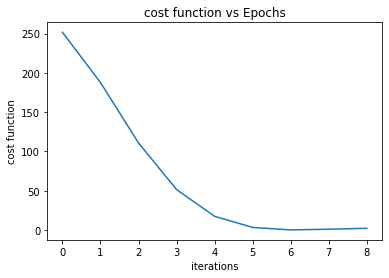

In [126]:
plt.plot(cost_list)
plt.xlabel("iterations")
plt.ylabel("cost function")
plt.title("cost function vs Epochs")

Text(0.5, 1.0, 'cost function vs theta0')

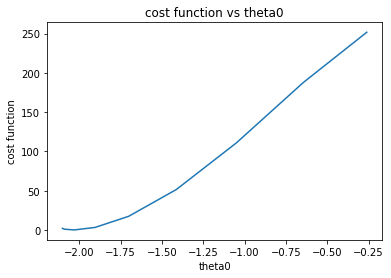

In [127]:
plt.plot(theta1_list,cost_list)
plt.xlabel("theta0")
plt.ylabel("cost function")
plt.title("cost function vs theta0")

Text(0.5, 1.0, 'best peridected fitting line for 1000 iterations')

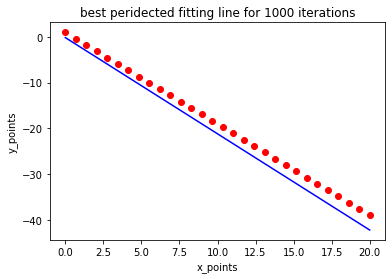

In [128]:
plt.plot(x_gen,y_gen,'or',linestyle='none')
plt.plot(x_gen,theta0_list[-1]+theta1_list[-1]*x_gen,'b')
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("best peridected fitting line for 1000 iterations")

In [129]:
from sklearn.metrics import r2_score
r2_score(y_gen,theta0_list[-1]+theta1_list[-1]*x_gen)

0.9644892431876612

# AdaGrad

In [15]:
def AdaGrad_Batch_GD_singleval(x,y,iterations,alpha,threshold_cost):
    ##1-assume theta0,theta1 
    theta0=0
    theta1=0 
    vt0=0 
    vt1=0 
    epsilon=0.0001
    m=len(x)
    cost_list=[]
    theta0_list=[]
    theta1_list= []
    for i in range(iterations):
        
        ##2-calculate hypothesis 
        hypothesis=theta0+theta1*x 
    
        ##3-calculate error 
        e=hypothesis-y 
        
        ##4-calculate cost function 
        cost=np.sum(e**2)/(2*m)
        cost_list.append(cost)
        
        ##5- calculate gradient
        gradient0=np.sum(e)/(m) 
        gradient1=np.dot(e.T,x)/(m) 
        
        ##6-update theta 
        vt0=vt0+(gradient0)**2
        vt1=vt1+(gradient1)**2 
        
        theta0=theta0-(alpha/np.sqrt(vt0)+epsilon)*gradient0 
        theta1=theta1-(alpha/np.sqrt(vt1)+epsilon)*gradient1
        
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        
        ##stop condition 
        if(abs(cost_list[i]-cost_list[i-1])<threshold_cost and i>0):
            print("stopped at iteration {}".format(i))
            break
        
    return cost_list,theta0_list,theta1_list
    

In [16]:
cost_list, theta0_list,theta1_list=AdaGrad_Batch_GD_singleval(x_gen,y_gen,1000,0.001,0.0001)

stopped at iteration 408


Text(0.5, 1.0, 'cost function vs Epochs')

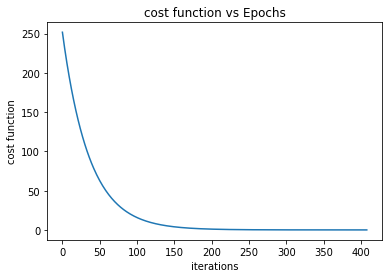

In [17]:
plt.plot(cost_list)
plt.xlabel("iterations")
plt.ylabel("cost function")
plt.title("cost function vs Epochs")

Text(0.5, 1.0, 'best peridected fitting line for 1000 iterations')

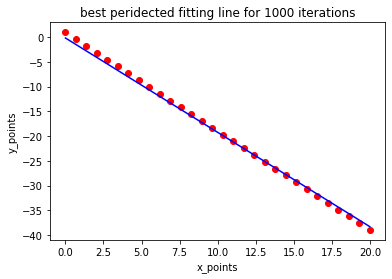

In [18]:
plt.plot(x_gen,y_gen,'or',linestyle='none')
plt.plot(x_gen,theta0_list[-1]+theta1_list[-1]*x_gen,'b')
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("best peridected fitting line for 1000 iterations")

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_gen,theta0_list[-1]+theta1_list[-1]*x_gen)

# RMS

In [20]:
def RMS_Batch_GD_singleval(x,y,iterations,alpha,beta,threshold_cost):
    ##1-assume theta0,theta1 
    theta0=0
    theta1=0 
    vt0=0 
    vt1=0 
    epsilon=0.0001
    m=len(x)
    cost_list=[]
    theta0_list=[]
    theta1_list= []
    for i in range(iterations):
        
        ##2-calculate hypothesis 
        hypothesis=theta0+theta1*x 
    
        ##3-calculate error 
        e=hypothesis-y 
        
        ##4-calculate cost function 
        cost=np.sum(e**2)/(2*m)
        cost_list.append(cost)
        
        ##5- calculate gradient
        gradient0=np.sum(e)/(m) 
        gradient1=np.dot(e.T,x)/(m) 
        
        ##6-update theta 
        vt0=beta*vt0+(1-beta)*(gradient0)**2
        vt1=beta*vt1+(1-beta)*(gradient1)**2 
        
        theta0=theta0-(alpha/np.sqrt(vt0)+epsilon)*gradient0 
        theta1=theta1-(alpha/np.sqrt(vt1)+epsilon)*gradient1
        
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        
        ##stop condition 
        if(abs(cost_list[i]-cost_list[i-1])<threshold_cost and i>0):
            print("stopped at iteration {}".format(i))
            break
        
    return cost_list,theta0_list,theta1_list
    

In [21]:
cost_list, theta0_list,theta1_list=RMS_Batch_GD_singleval(x_gen,y_gen,1000,0.001,0.9,0.0001)

stopped at iteration 350


In [ ]:
plt.plot(cost_list)
plt.xlabel("iterations")
plt.ylabel("cost function")
plt.title("cost function vs Epochs")

In [ ]:
plt.plot(x_gen,y_gen,'or',linestyle='none')
plt.plot(x_gen,theta0_list[-1]+theta1_list[-1]*x_gen,'b')
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("best peridected fitting line for 1000 iterations")

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_gen,theta0_list[-1]+theta1_list[-1]*x_gen)

# Adam

In [132]:
def Adam_Batch_GD_singleval(x,y,iterations,alpha,beta1,beta2,threshold_cost):
    ##1-assume theta0,theta1 
    theta0=0
    theta1=0 
    vt0=0 
    vt1=0 
    mt0=0
    mt1=0
    epsilon=0.0001
    m=len(x)
    cost_list=[]
    theta0_list=[]
    theta1_list= []
    for i in range(iterations):
        
        ##2-calculate hypothesis 
        hypothesis=theta0+theta1*x 
    
        ##3-calculate error 
        e=hypothesis-y 
        
        ##4-calculate cost function 
        cost=np.sum(e**2)/(2*m)
        cost_list.append(cost)
        
        ##5- calculate gradient
        gradient0=np.sum(e)/(m) 
        gradient1=np.dot(e.T,x)/(m) 
        
        ##6-update theta 
        mt0=(beta1*mt0+(1-beta1)*gradient0)
        mt1=(beta1*mt1+(1-beta1)*gradient1)
        
      
        
        vt0=beta2*vt0+(1-beta2)*(gradient0)**2
        vt1=beta2*vt1+(1-beta2)*(gradient1)**2 
        
        vt0hat=vt0/(1-beta1)
        vt1hat=vt1/(1-beta2)
        theta0=theta0-(alpha/np.sqrt(vt0hat)+epsilon)*mt0
        theta1=theta1-(alpha/np.sqrt(vt1hat)+epsilon)*mt1
        
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        
        ##stop condition 
        if(abs(cost_list[i]-cost_list[i-1])<threshold_cost and i>0):
            print("stopped at iteration {}".format(i))
            break
        
    return cost_list,theta0_list,theta1_list
    

In [133]:
cost_list, theta0_list,theta1_list=Adam_Batch_GD_singleval(x_gen,y_gen,1000,0.001,0.9,0.8,0.0001)

stopped at iteration 254


Text(0.5, 1.0, 'cost function vs Epochs')

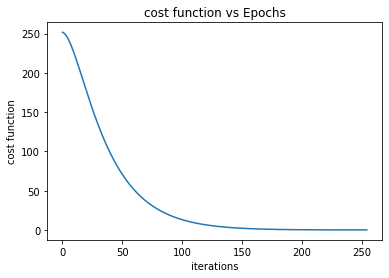

In [134]:
plt.plot(cost_list)
plt.xlabel("iterations")
plt.ylabel("cost function")
plt.title("cost function vs Epochs")

Text(0.5, 1.0, 'best peridected fitting line for 1000 iterations')

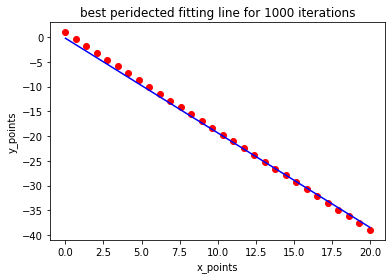

In [135]:
plt.plot(x_gen,y_gen,'or',linestyle='none')
plt.plot(x_gen,theta0_list[-1]+theta1_list[-1]*x_gen,'b')
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("best peridected fitting line for 1000 iterations")

In [136]:
from sklearn.metrics import r2_score
r2_score(y_gen,theta0_list[-1]+theta1_list[-1]*x_gen)

0.9973527604316096